In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [88]:
df = pd.read_csv("C:/Users/zachp/Dropbox/AAEcon/213r/machine_learning/213Project/ted_main.csv")

data = pd.read_csv("C:/Users/zachp/Dropbox/AAEcon/213r/machine_learning/213Project/cleaned_data.csv")
data.head()


,Unnamed: 0,comments,duration,languages,published_date,speaker_occupation,title,views,Positive,Negative,...,Scientific Fields_tag,media/entertainment_tag,Organizing/Perceiving Information_tag,Middle East_tag,Epidemics_tag,Outer-Space_tag,Vices/Prejudices_tag,exploration_tag,robots/prosthetics_tag,animals/organisms_tag
0,0,4553,1164,60,1151367060,Author/educator,Do schools kill creativity?,47227110,91538,1138,...,0,0,0,0,0,0,0,0,0,0
1,1,265,977,43,1151367060,Climate advocate,Averting the climate crisis,3200520,2169,564,...,1,0,0,0,0,0,0,0,0,0
2,2,124,1286,26,1151367060,Technology columnist,Simplicity sells,1636292,2327,351,...,0,1,1,0,0,0,0,0,0,0
3,3,200,1116,35,1151367060,Activist for environmental justice,Greening the ghetto,1697550,3487,156,...,0,0,0,0,0,0,0,0,0,0
4,4,593,1190,48,1151440680,Global health expert; data visionary,The best stats you've ever seen,12005869,25062,310,...,1,1,1,1,0,0,0,0,0,0


In [3]:
data.columns


Index(['Unnamed: 0', 'comments', 'duration', 'languages', 'published_date',
       'speaker_occupation', 'title', 'views', 'Positive', 'Negative',
       'Moderate', 'related_views', 'event_class', 'Humanity/Progress_tag',
       'arts/creativity_tag', 'philanthropy/religion_tag', 'music_tag',
       'Global issues_tag', 'Scientific Fields_tag', 'media/entertainment_tag',
       'Organizing/Perceiving Information_tag', 'Middle East_tag',
       'Epidemics_tag', 'Outer-Space_tag', 'Vices/Prejudices_tag',
       'exploration_tag', 'robots/prosthetics_tag', 'animals/organisms_tag'],
      dtype='object')

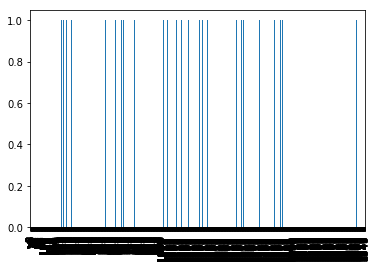

In [4]:
tag1 = data['Humanity/Progress_tag'] <1
tag1.plot(kind = 'bar')


In [5]:
tags = data[['Humanity/Progress_tag'],['arts/creativity_tag'], ['philanthropy/religion_tag'], ['music_tag'],['Global issues_tag'], ['Scientific Fields_tag'], ['media/entertainment_tag'],['Organizing/Perceiving Information_tag'], ['Middle East_tag'],['Epidemics_tag'], ['Outer-Space_tag'], ['Vices/Prejudices_tag'],['exploration_tag'], ['robots/prosthetics_tag'], ['animals/organisms_tag']]

TypeError: unhashable type: 'list'

In [37]:
neg_views = len(data[data['Negative']>data['Positive']])
pos_views = len(data[data['Negative']<data['Positive']])
#mod_views = len(data[(data['Moderate']> data['Positive']) & (data['Moderate']>data['Negative'])])
mod_views = len(data[(data['Moderate']> (data['Positive']+data['Negative']))])
print(neg_views)
print(pos_views)
print(mod_views)



13
2537
0


TypeError: show() got an unexpected keyword argument 'fig_size'

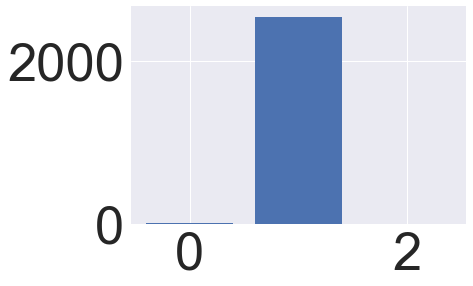

In [40]:
plt.bar(range(3), [neg_views, pos_views, mod_views])
plt.show(fig_size = (8, 25))

In [ ]:
import statsmodels as sm


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 28 columns):
Unnamed: 0                               2550 non-null int64
comments                                 2550 non-null int64
duration                                 2550 non-null int64
languages                                2550 non-null int64
published_date                           2550 non-null int64
speaker_occupation                       2544 non-null object
title                                    2550 non-null object
views                                    2550 non-null int64
Positive                                 2550 non-null int64
Negative                                 2550 non-null int64
Moderate                                 2550 non-null int64
related_views                            2550 non-null int64
event_class                              2550 non-null object
Humanity/Progress_tag                    2550 non-null int64
arts/creativity_tag                 

In [11]:
data= data.drop(['title'], axis = 1)

In [12]:

data = pd.get_dummies(data)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)
scaled_df = scaler.transform(data)

scaled_df


array([[-1.73137171, 15.45185213,  0.90253409, ..., -0.19778727,
        -0.47597398,  1.2678178 ],
       [-1.73001323,  0.26017744,  0.40244824, ..., -0.19778727,
        -0.47597398,  1.2678178 ],
       [-1.72865476, -0.23936224,  1.22879331, ..., -0.19778727,
        -0.47597398,  1.2678178 ],
       ...,
       [ 1.72865476, -0.64324538, -0.46935917, ..., -0.19778727,
        -0.47597398,  1.2678178 ],
       [ 1.73001323, -0.56530302,  0.73138172, ..., -0.19778727,
         2.1009552 , -0.78875687],
       [ 1.73137171, -0.65033105, -0.82236095, ..., -0.19778727,
        -0.47597398,  1.2678178 ]])

In [13]:
data.head()

,Unnamed: 0,comments,duration,languages,published_date,views,Positive,Negative,Moderate,related_views,...,speaker_occupation_medical inventor,speaker_occupation_photographer + visual artist,speaker_occupation_physicist,event_class_Other,event_class_TEDGlobal,event_class_TEDNYC,event_class_TEDSalon,event_class_TEDWomen,event_class_TEDx,event_class_Yearly TED Conference
0,0,4553,1164,60,1151367060,47227110,91538,1138,1174,3027062,...,0,0,0,0,0,0,0,0,0,1
1,1,265,977,43,1151367060,3200520,2169,564,203,1118767,...,0,0,0,0,0,0,0,0,0,1
2,2,124,1286,26,1151367060,1636292,2327,351,146,1846195,...,0,0,0,0,0,0,0,0,0,1
3,3,200,1116,35,1151367060,1697550,3487,156,85,776189,...,0,0,0,0,0,0,0,0,0,1
4,4,593,1190,48,1151440680,12005869,25062,310,248,1907337,...,0,0,0,0,0,0,0,0,0,1


In [73]:
import statsmodels.api as sm

C:\Users\zachp\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [ ]:
#y = data.views
#X = data
#X = sm.add_constant(X)
#model = sm.OLS(y,X)
#results = model.fit()
#print(results.summary())

In [14]:
corrmat = data.corr()
k=15 


<function matplotlib.pyplot.show>

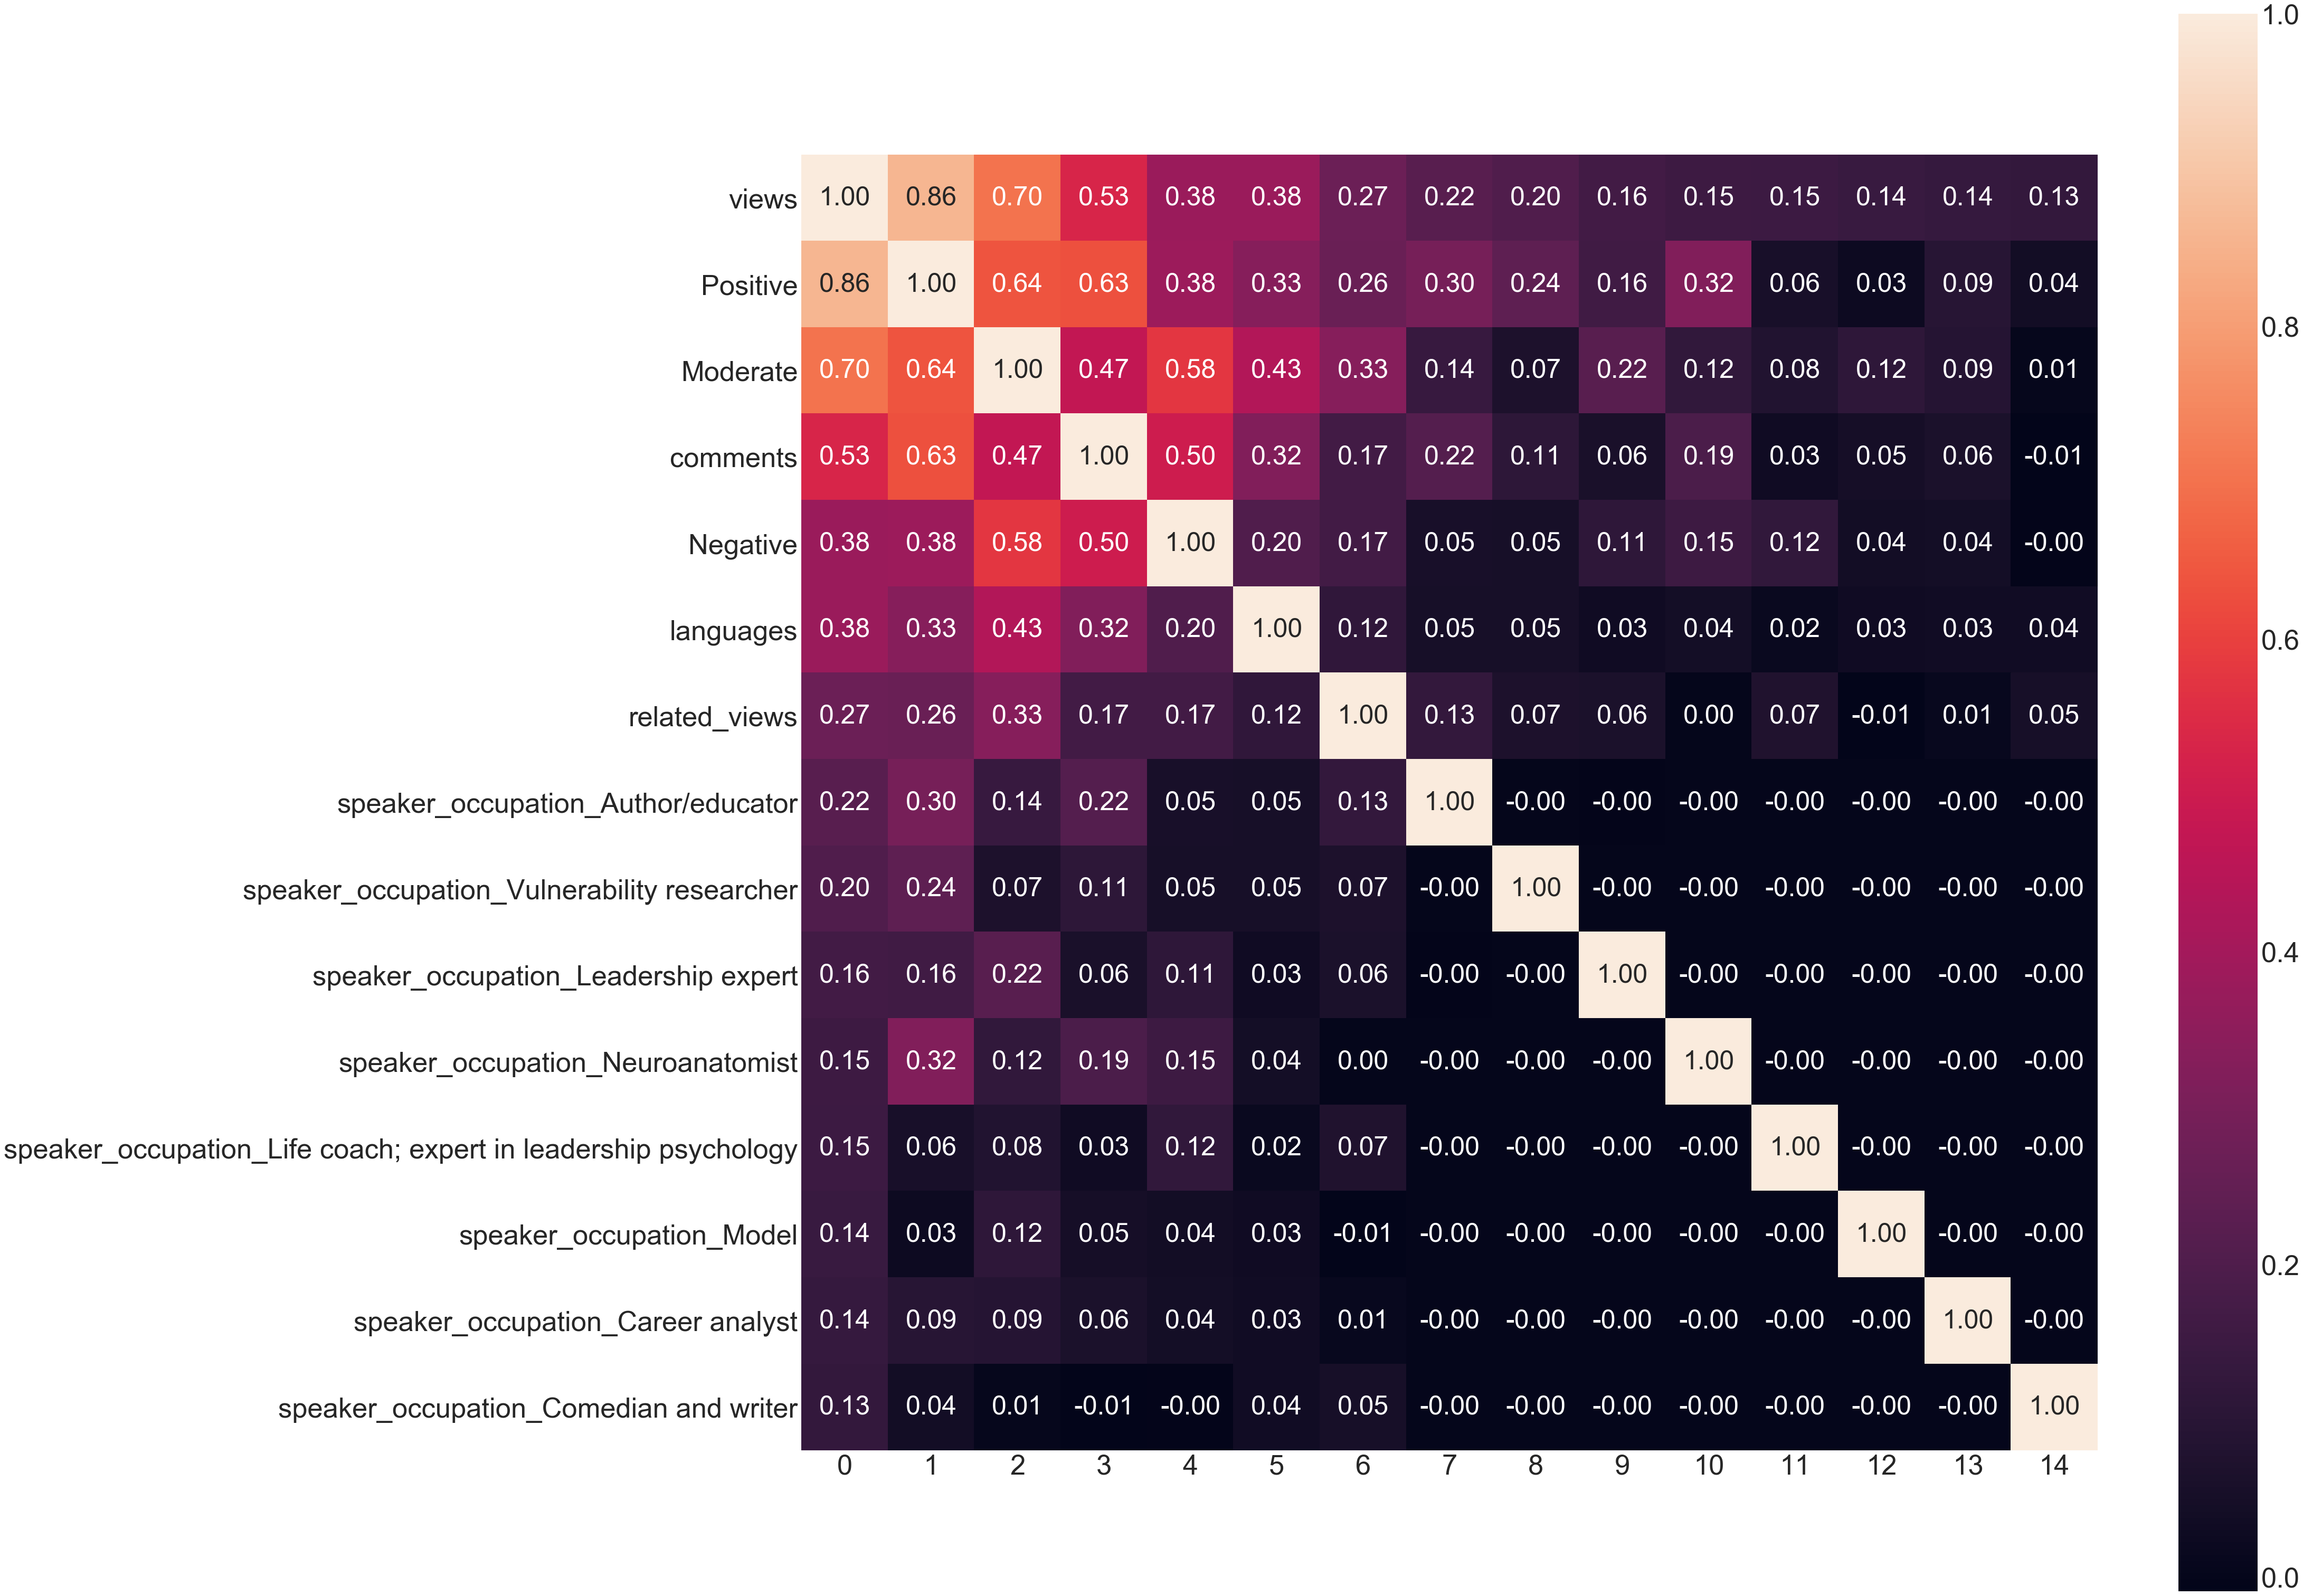

In [21]:
cols = corrmat.nlargest(k, 'views')['views'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale = 5.25)
f, ax = plt.subplots(figsize = (55,55))
hm = sns.heatmap(cm, cbar = True, annot = True, square = True, fmt = '.2f', annot_kws ={'size':50}, yticklabels = cols.values)
plt.show

In [58]:
#make heatmap without speaker occupation
data2 = pd.read_csv("C:/Users/zachp/Dropbox/AAEcon/213r/machine_learning/213Project/cleaned_data.csv")

data2 = data2.drop((['speaker_occupation','title']), axis = 1)


corrmat2 = data2.corr()
k=15

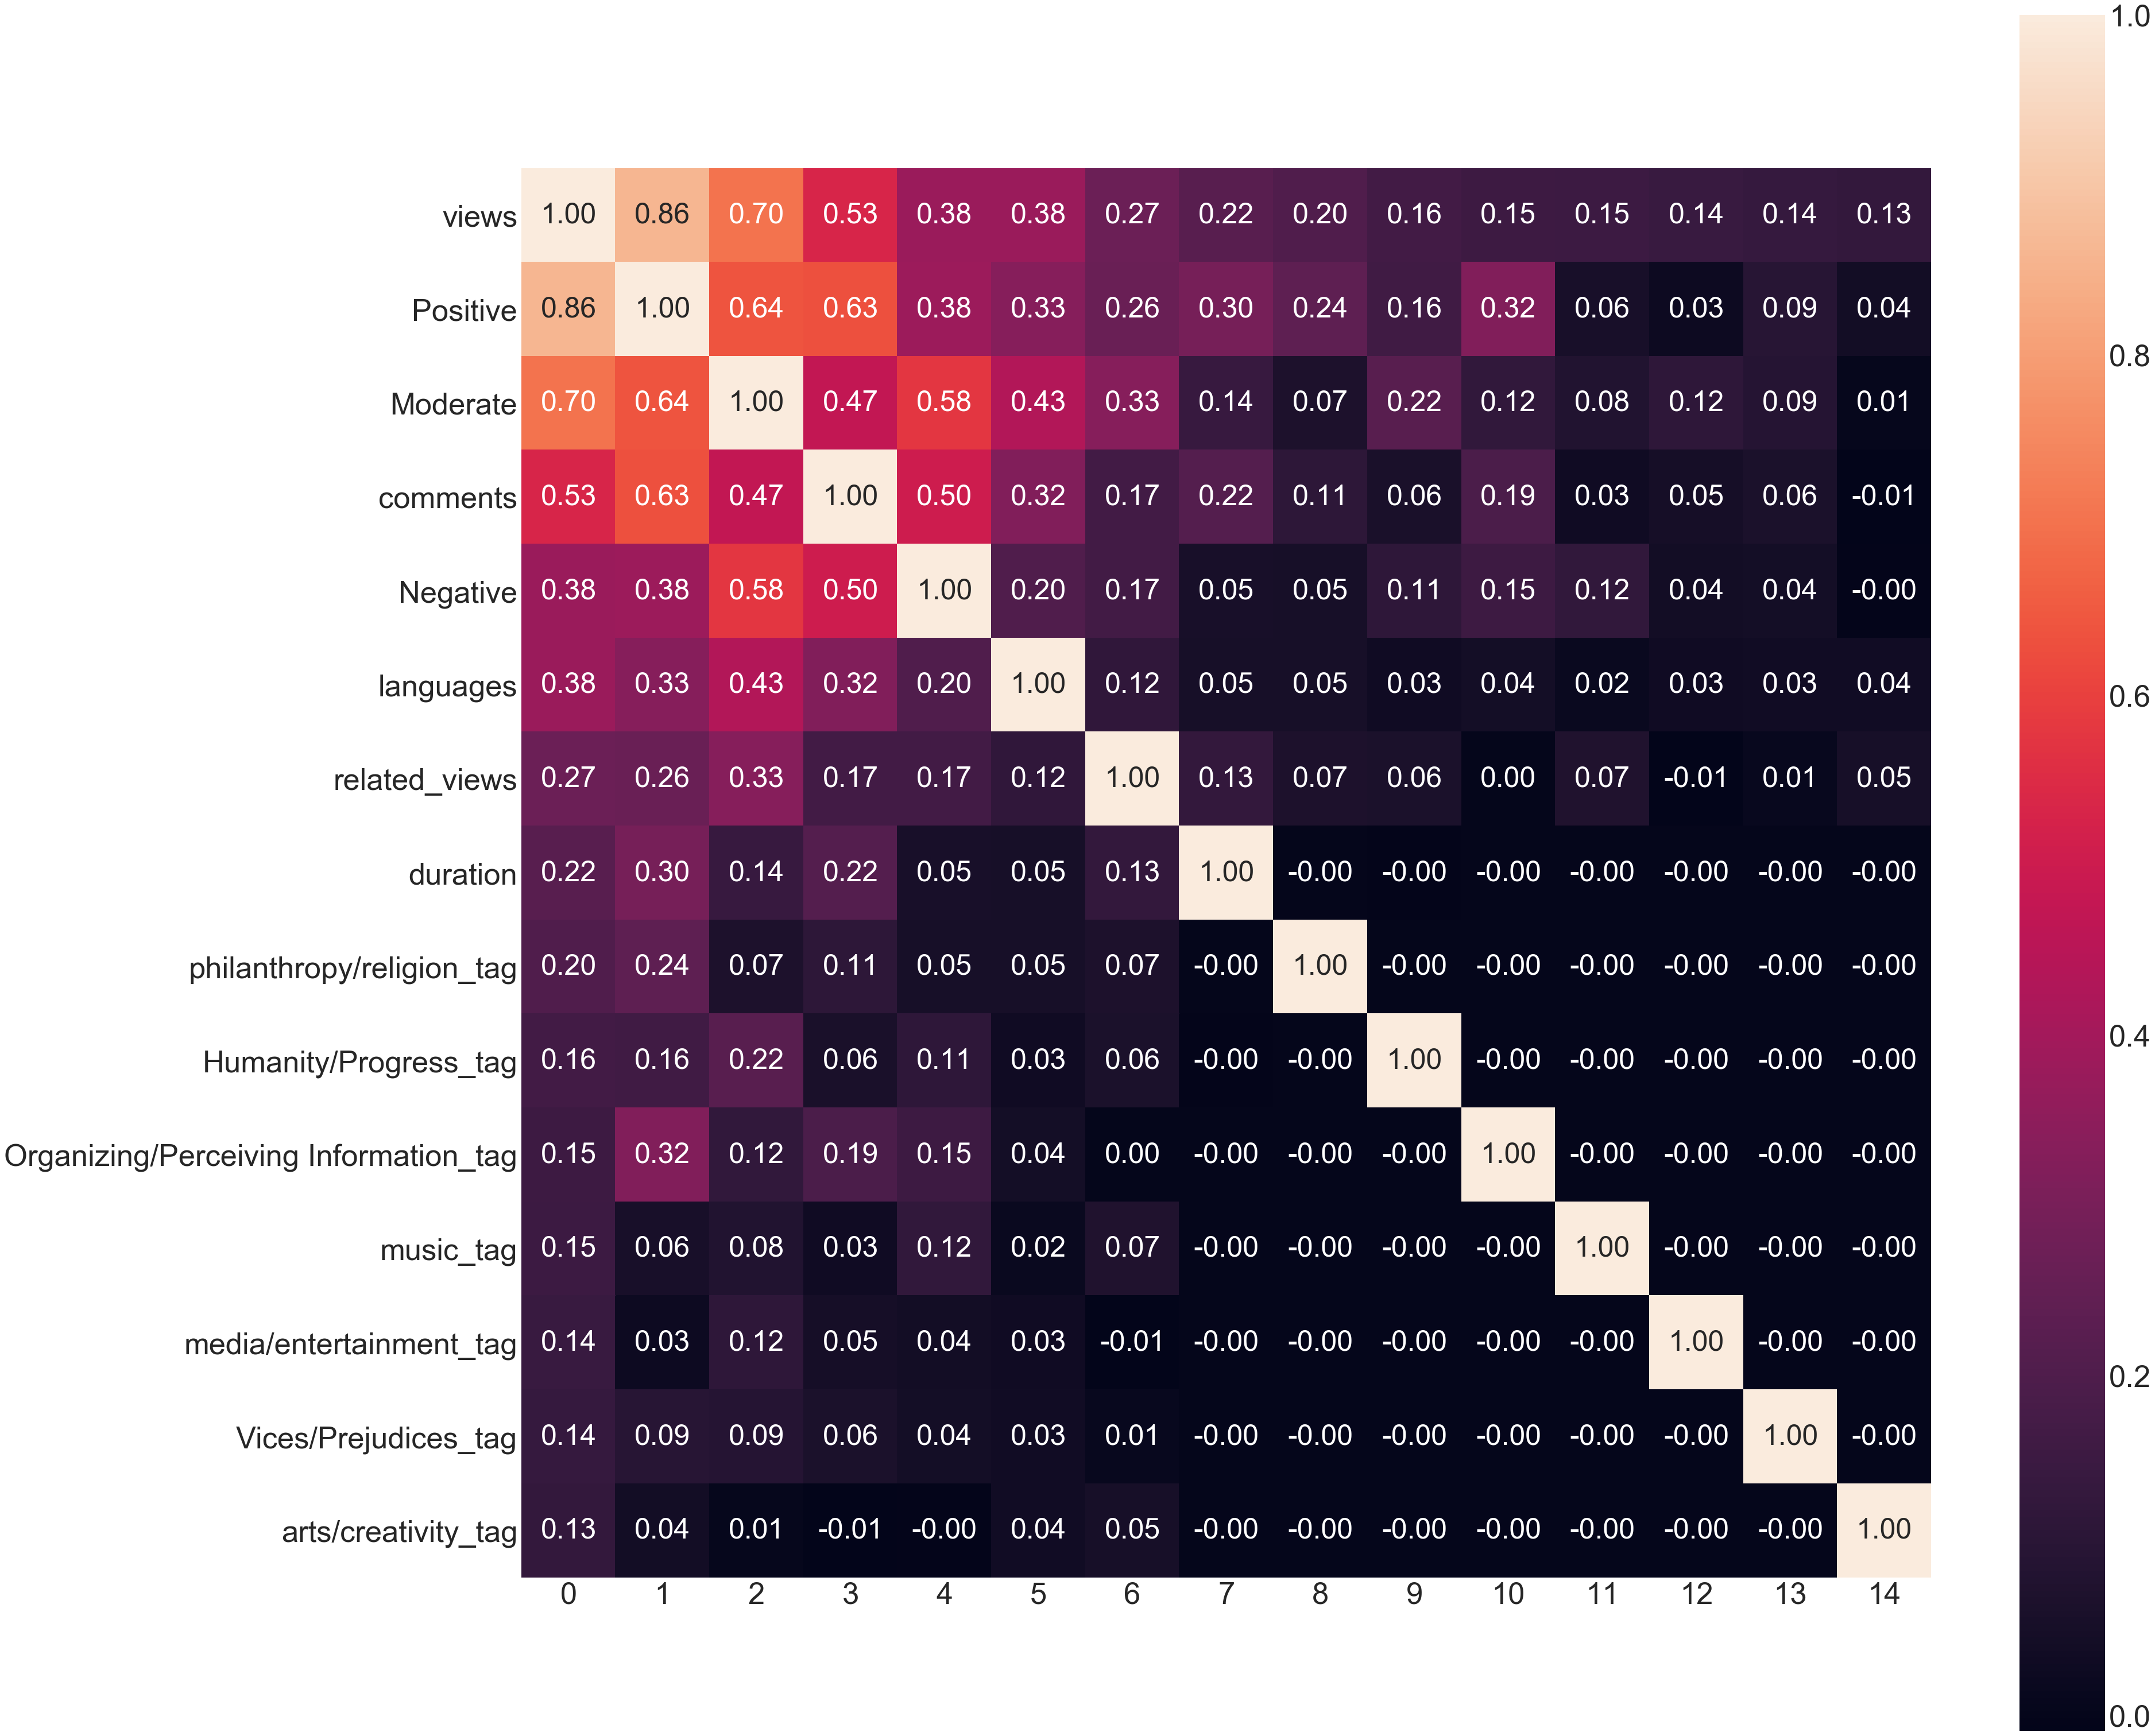

In [59]:
cols = corrmat2.nlargest(k, 'views')['views'].index
cm2 = np.corrcoef(data2[cols].values.T)
sns.set(font_scale = 5.25)
f, ax = plt.subplots(figsize = (55,55))
hm = sns.heatmap(cm, cbar = True, annot = True, square = True, fmt = '.2f', annot_kws ={'size':50}, yticklabels = cols.values)
plt.show()

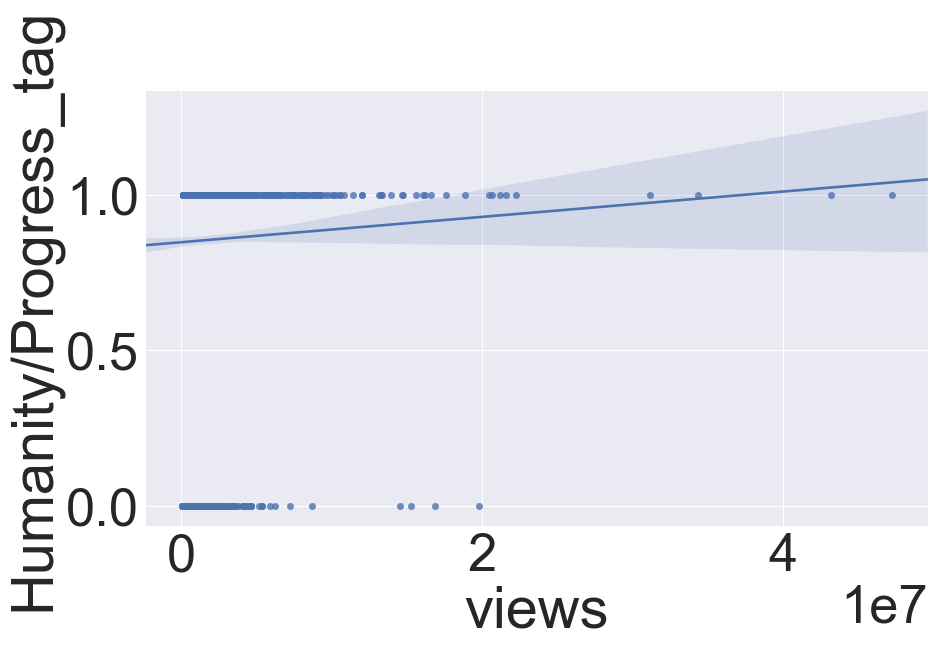

In [47]:
f, ax = plt.subplots(figsize= (14,8))
sns.regplot(data.views, data['Humanity/Progress_tag'])

In [68]:
#make a heat map with of just tags

data3 = data[['views','Humanity/Progress_tag', 'arts/creativity_tag', 'philanthropy/religion_tag', 'music_tag', 'Global issues_tag', 'media/entertainment_tag', 'Middle East_tag', 'Epidemics_tag', 'Outer-Space_tag', 'Vices/Prejudices_tag', 'exploration_tag', 'robots/prosthetics_tag', 'animals/organisms_tag']]

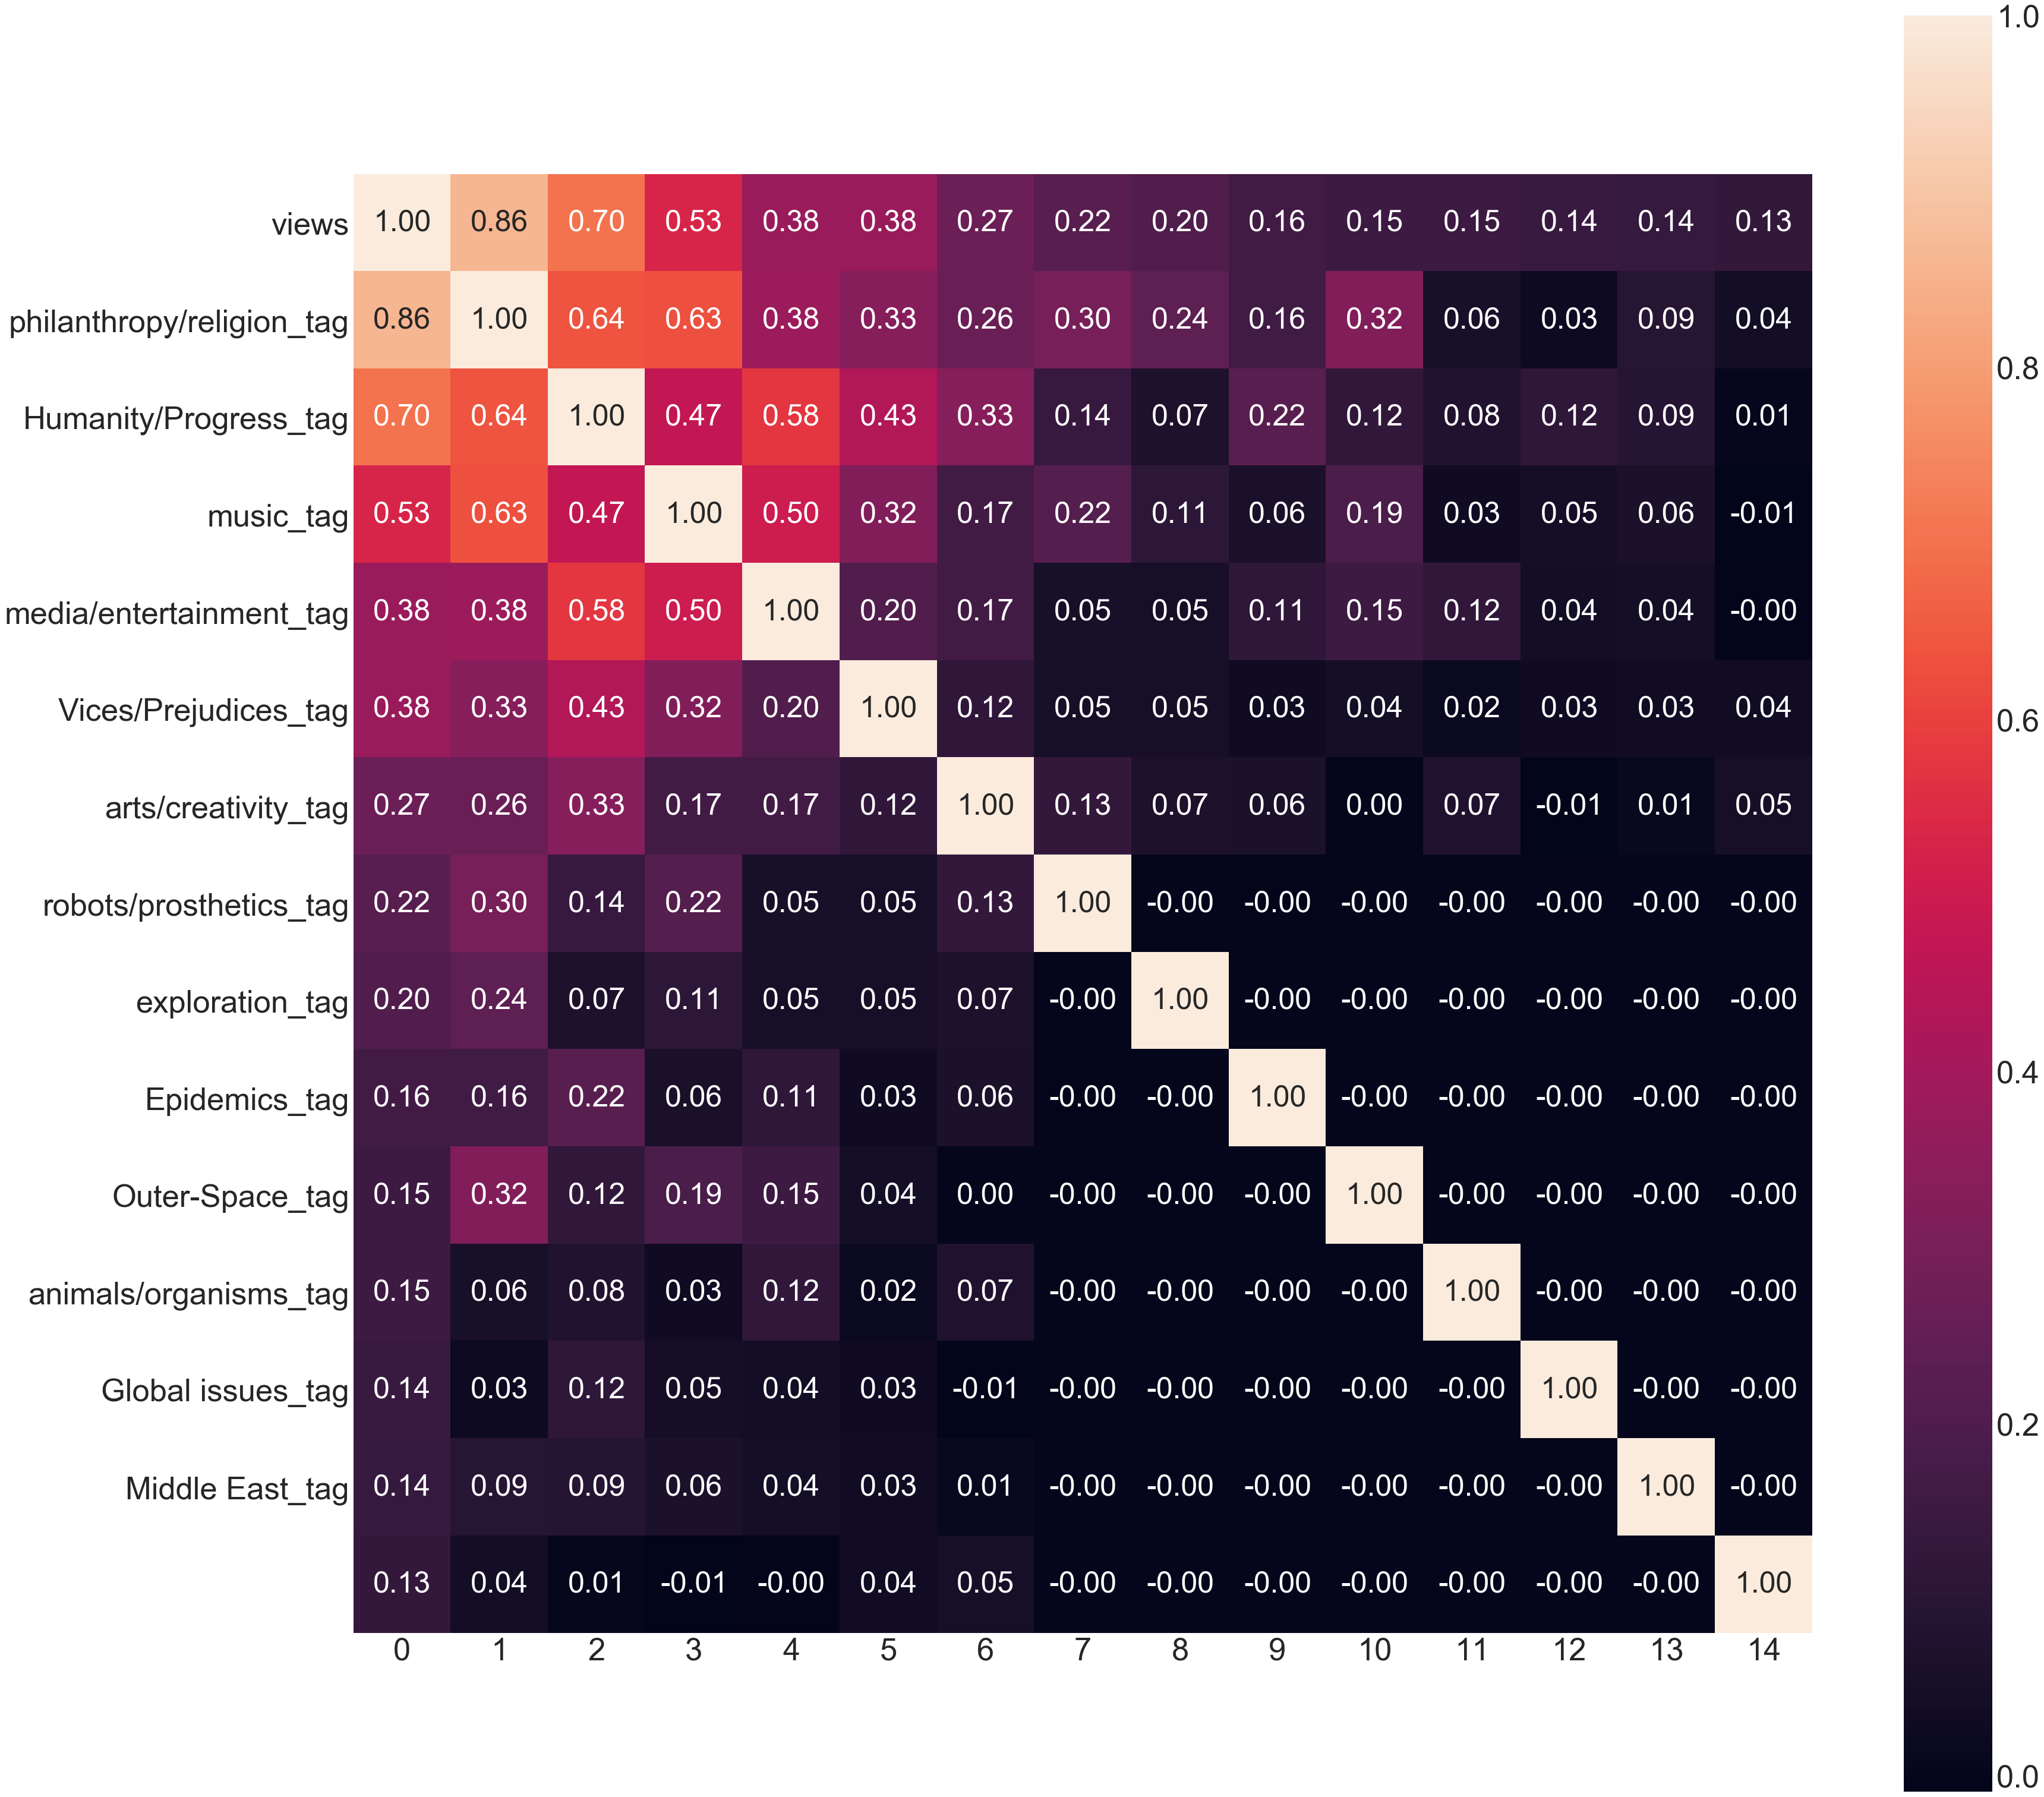

In [69]:
corrmat3 = data3.corr()
k=15
cols = corrmat3.nlargest(k, 'views')['views'].index
cm3 = np.corrcoef(data3[cols].values.T)
sns.set(font_scale = 5.25)
f, ax = plt.subplots(figsize = (55,55))
hm = sns.heatmap(cm, cbar = True, annot = True, square = True, fmt = '.2f', annot_kws ={'size':50}, yticklabels = cols.values)
plt.show()

In [71]:
from sklearn.model_selection import train_test_split
target = data3['views']

X_train, X_test, y_train, y_test = train_test_split(scaled_df, target, test_size = 0.2, random_state = 42)



In [80]:
y = data3.views

X = data3.drop(['views'], axis = 1)

model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  views   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     83.08
Date:                Sat, 07 Apr 2018   Prob (F-statistic):          2.18e-184
Time:                        11:12:52   Log-Likelihood:                -41215.
No. Observations:                2550   AIC:                         8.246e+04
Df Residuals:                    2537   BIC:                         8.253e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Humanity/Progress_tag 

In [90]:
f, ax = plt.subplots(figsize = ('14,8'))
sns.barplot(x = 'tags', y = 'views', data = df)

TypeError: from_bounds() takes 4 positional arguments but 6 were given

In [112]:

#data['published_date'] = [x for x in data['published_date'] if [(x > x.published_date.mean() - 2 * sd) or (x < x.published_date.mean() + 2 * sd)]]
#data2['views'] = [x for x in data['views'] if [(x > mean - 2 * sd) or (x < mean + 2 * sd)]]


data['published_date'] = data['published_date'].apply(lambda x: x if x < abs(data['published_date'].mean()-2*data['published_date'].std()) else np.nan)

In [113]:
data['published_date'].isnull().sum()

2550

In [114]:
data.shape


(2550, 28)